In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import argrelextrema

In [3]:
%matplotlib inline
import pylab as pl

In [4]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [5]:
import math

In [6]:
from sklearn.cluster import KMeans
from src2.utils import *

In [7]:
def add_labels(x_list, y_list, labels):
    for x,y,label in zip(x_list, y_list, labels):
        plt.text(x+0.25, y-0.25, label)

In [8]:
def make_test_data(seg_count, point_count):
    x = np.random.uniform(2, 10, seg_count)
    x = np.cumsum(x)
    x *= 10 / x.max()
    y = np.cumsum(np.random.uniform(-1, 1, seg_count))
    X = np.random.uniform(0, 10, point_count)
    Y = np.interp(X, x, y) + np.random.normal(0, 0.05, point_count)
    return X, Y

In [9]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

In [10]:
def trouver_df_groupee(nom_fichier):
    df=pd.read_csv(nom_fichier)
    df["Timestamp"] = pd.to_datetime(df["timestamp"])
    df_gb = df.groupby(pd.Grouper(key="Timestamp", axis=0, freq="D")).mean()
    df_gb.reset_index(inplace=True)
    return df_gb
# trouver_df_groupee("./sensor.csv")

In [35]:
df_g = trouver_df_groupee("./sensor.csv")
df_g

,Timestamp,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01,719.5,2.454139,47.318882,52.567363,45.273315,634.166035,74.516172,13.348212,16.161459,...,32.626770,40.682243,50.859817,51.617557,45.070015,39.786884,197.029723,92.171022,241.056817,217.054678
1,2018-04-02,2159.5,2.429367,48.595226,52.199163,44.094026,635.990899,77.960694,13.340421,16.161022,...,33.555409,43.272566,46.112437,66.206316,53.731031,40.172284,203.099479,73.322964,243.407801,205.087368
2,2018-04-03,3599.5,2.435093,49.266702,52.060062,44.336599,640.359938,76.903797,13.452223,16.301238,...,34.660190,42.534900,44.204121,47.936961,42.168222,40.946113,157.432927,64.259821,201.386879,201.646492
3,2018-04-04,5039.5,2.452493,50.429565,51.959000,45.096479,640.173640,75.858830,13.512238,16.511281,...,34.545354,43.123188,42.631220,45.638222,43.511485,40.603311,154.669415,67.019917,213.312395,204.283411
4,2018-04-05,6479.5,2.454101,49.353086,52.096564,43.982806,636.350491,76.824878,13.425036,16.227121,...,33.312353,42.356406,45.254630,46.999582,44.231047,39.532897,213.241463,82.239020,240.274159,234.841377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2018-08-27,213839.5,2.397325,49.077267,50.995007,44.272972,629.476285,75.191813,14.732405,16.555016,...,31.871201,44.036998,45.100107,45.915163,54.741151,41.868824,265.343482,75.546955,NaN,215.756213
149,2018-08-28,215279.5,2.484509,48.750963,50.825465,44.272459,631.976319,72.276470,15.060769,16.604658,...,31.891636,43.499707,46.501254,60.823367,61.883520,42.537334,282.142366,72.129388,NaN,217.672568
150,2018-08-29,216719.5,2.462678,48.388881,51.325923,44.761404,629.564036,76.858206,15.095380,16.576662,...,32.484627,43.391200,51.786748,65.166860,61.894571,42.187888,313.535835,87.895648,NaN,217.231304
151,2018-08-30,218159.5,2.440611,49.141889,51.904927,45.522188,628.580324,73.744396,15.075095,16.537262,...,33.278354,42.855538,57.698969,55.559976,56.916112,45.339225,280.001366,95.470236,NaN,221.649949


In [57]:
def calculate_list_state(string_nom_sensor, df_gb):
    # lowess
    x=pd.to_numeric(df_gb.index)
    y=pd.to_numeric(df_gb[string_nom_sensor])
    result = lowess(y, x, frac=0.05, it=3, delta=0.0)
    ar =[]
    for i in range(len(result[0])):
        b =[]
        for j in range(len(result)):
            b.append(result[j][i])
        ar.append(b)
    #matrix distance
    tab_dist = []
    for i in range(len(ar[0])):
        tab_dist.append([])
    for i in range(len(ar[0])):    
        for j in range(len(ar[1])):
            tab_dist[i].append([])
    for i in range(len(ar[0])):
        for j in range(len(ar[1])):
            tab_dist[i][j] = abs(ar[1][i] - ar[1][j] )
    #cliassification : k-means
    cls = KMeans(n_clusters=3, init="random")
    cls.fit(tab_dist)
    labels_k = pd.Series(cls.labels_, name="K-means")
    # classer de nb plus à moins(proba plus : normal -> abnormal)
    n1=len(labels_k[labels_k==0])
    n2=len(labels_k[labels_k==1])
    n3=len(labels_k[labels_k==2])
    if n1 > max(n2,n3):
        labels_k[labels_k==0] = 4
        if n2 > n3:
            labels_k[labels_k==1] = 5
            labels_k[labels_k==2] = 6
        else:
            labels_k[labels_k==1] = 6
            labels_k[labels_k==2] = 5
    elif n2 > max(n1,n3):
        labels_k[labels_k==1] = 4
        if n1 > n3:
            labels_k[labels_k==0] = 5
            labels_k[labels_k==2] = 6
        else:
            labels_k[labels_k==0] = 6
            labels_k[labels_k==2] = 5
    else:
        labels_k[labels_k==3] = 4
        if n1 > n2:
            labels_k[labels_k==0] = 5
            labels_k[labels_k==1] = 6
        else:
            labels_k[labels_k==0] = 6
            labels_k[labels_k==1] = 5
    list_labels_k = []
    labels_k[labels_k==4] = 0
    a = 1
    labels_k[labels_k==5] = 1
    b = 1
    labels_k[labels_k==6] = 2
    c = 1
    #to list
    list_labels_k = labels_k.to_list()
    return labels_k,ar # list state for this sensor

In [58]:
def trouver_transitionMatrix(array_labels,dim):
    tab_proba=[]
    for i in range(dim):
        tab_proba.append([])
    for i in range(dim):    
        for j in range(dim):
            tab_proba[i].append(0)
    
    for i in range(len(array_labels)-1) : 
        a=array_labels[i]
        b=array_labels[i+1]
        tab_proba[a][b] = tab_proba[a][b]+1 
    for i in range(dim):
        sum_ligne = sum(tab_proba[i])
        for j in range(dim):
            tab_proba[i][j] = tab_proba[i][j]/sum_ligne
    return tab_proba

In [59]:
def trouver_tabres_proba_markovain(list_state_sensor_but, transitionMatrix):
    tab_pb_res=[]
    for i in range(len(list_state_sensor_but)):
        tab_pb_res.append(1)
    for i in range(len(list_state_sensor_but)-5) :
        nb_proba = 1
        for j in range(5) :
            nb_proba = nb_proba * transitionMatrix[list_state_sensor_but[i+j]][list_state_sensor_but[i+j+1]]
        tab_pb_res[i+j+1] = nb_proba
    return tab_pb_res

In [60]:
def trouver_OK_Erreur_Label(tab_pb_res):
    tab_label  = []
    for i in tab_pb_res:
        if i > 0.5:
            tab_label.append("OK")
        else :
            tab_label.append("Erreur")
    return tab_label

In [67]:
def M_markovain(data_df,nom_train_data,nom_test_data): 
    state_sensor_train,valeur_lowess_sensor_train = calculate_list_state(nom_train_data,data_df)
    list_state_sensor_train = state_sensor_train.to_list()
    
    state_sensor_test,valeur_lowess_sensor_test = calculate_list_state(nom_test_data,data_df)
    list_state_sensor_test = state_sensor_test.to_list()
    
    transitionMatrix = trouver_transitionMatrix(state_sensor_train,3)
    
    tab_pb_res = trouver_tabres_proba_markovain(list_state_sensor_test,transitionMatrix)
    tab_label_res = trouver_OK_Erreur_Label(tab_pb_res)
    
    sns.scatterplot(x = valeur_lowess_sensor_test[0], y=valeur_lowess_sensor_test[1], hue=tab_label_res)
    plt.show()

In [41]:
# state_sensor8,valeur_lowess_sensor8 = calculate_list_state("sensor_08",df_g)
# list_state_sensor8 = state_sensor8.to_list()
# sns.scatterplot(x = df_g["Timestamp"][1:-1], y=valeur_lowess_sensor8[1], hue=list_state_sensor8)
# plt.show()

In [42]:
# q=1

In [43]:
# state_sensor1,valeur_lowess_sensor1 = calculate_list_state("sensor_01",df_g)
# list_state_sensor1 = state_sensor1.to_list()
# sns.scatterplot(x = df_g["Timestamp"], y=valeur_lowess_sensor1[1], hue=list_state_sensor1)
# plt.show()

In [44]:
# transitionMatrix8 = trouver_transitionMatrix(state_sensor8,3)

In [45]:
# if sum(transitionMatrix8[0])+sum(transitionMatrix8[1])+sum(transitionMatrix8[1]) != 3:
#     print("Somewhere, something went wrong. Transition matrix, perhaps?")
# else: print("All is gonna be okay, you should move on!! ;)")

In [46]:
# tab_pb_res1 = trouver_tabres_proba_markovain(list_state_sensor1,transitionMatrix8)
# tab_label1 = trouver_OK_Erreur_Label(tab_pb_res1)

In [47]:
# sns.scatterplot(x = df_g["Timestamp"], y=valeur_lowess_sensor1[1], hue=tab_label1)
# plt.show()

In [ ]:
# it's possible that it has some error of lance in first time 
# it's not problem of logique, it's ptoblem of stockage or else that i don't realy understand
# try seconde time and it could go on

<function matplotlib.pyplot.show(close=None, block=None)>

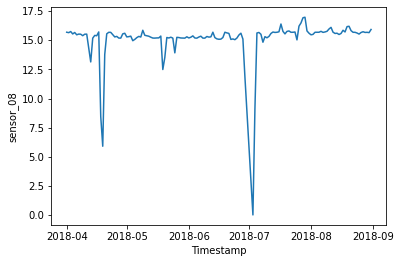

In [73]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df_g)
plt.show

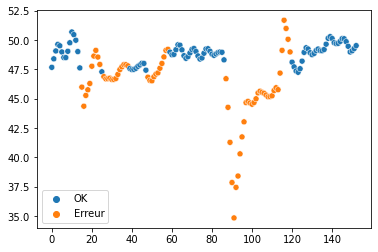

In [68]:
M_markovain(df_g,"sensor_08","sensor_01")

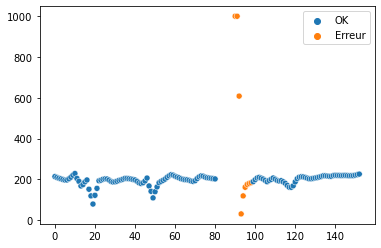

In [69]:
M_markovain(df_g,"sensor_08","sensor_51")

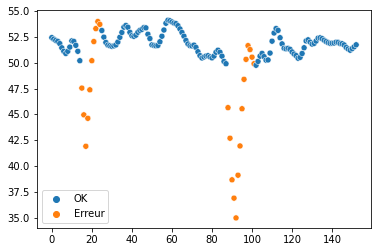

In [71]:
M_markovain(df_g,"sensor_08","sensor_02")